In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
os.getcwd()


'd:\\Data Science\\Churn_Predictor\\Sentiment-Based-Retention-Strategy-Chatbot'

Importing the dataset as a pandas dataframe and further analysis

In [2]:
import pandas as pd

df = pd.read_excel("churn.xlsx")
print("\nfirst few lines of the dataset")
display(df.head())

print(f"Data shape:{df.shape}")


first few lines of the dataset


,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


Data shape:(999, 23)


In [3]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp',
       'TechSupport Availed', 'Zero Balance Account', 'FDs',
       'Interest Deposited', 'Paperless Banking',
       'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)',
       'Churn', 'Customer Feedback', 'Category', 'Recommendation'],
      dtype='object')

In [4]:
df.describe()

,Senior Citizen,tenure in months,Monthly Average Balance (USD),Recommendation
count,999.000000,994.000000,995.000000,0.0
mean,0.163163,32.247485,66.455578,NaN
std,0.369700,24.800698,29.922493,NaN
min,0.000000,0.000000,18.950000,NaN
25%,0.000000,8.000000,42.000000,NaN
50%,0.000000,29.000000,74.250000,NaN
75%,0.000000,56.000000,90.050000,NaN
max,1.000000,72.000000,116.250000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     999 non-null    object 
 1   Gender                         999 non-null    object 
 2   Senior Citizen                 999 non-null    int64  
 3   Marital Status                 999 non-null    object 
 4   Dependents                     997 non-null    object 
 5   tenure in months               994 non-null    float64
 6   Priority Account               997 non-null    object 
 7   Credit Cards                   997 non-null    object 
 8   Loan Account                   998 non-null    object 
 9   Netbanking                     998 non-null    object 
 10  Debit Card                     999 non-null    object 
 11  MobileApp                      999 non-null    object 
 12  TechSupport Availed            998 non-null    obj

Checking for the missing values

In [6]:
missing_values = df.isnull().sum()

In [7]:
numerical_columns = ["tenure in months","Monthly Average Balance (USD)"]  

outliers = df[numerical_columns].describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

missing_values,outliers


(customerID                         0
 Gender                             0
 Senior Citizen                     0
 Marital Status                     0
 Dependents                         2
 tenure in months                   5
 Priority Account                   2
 Credit Cards                       2
 Loan Account                       1
 Netbanking                         1
 Debit Card                         0
 MobileApp                          0
 TechSupport Availed                1
 Zero Balance Account               2
 FDs                                4
 Interest Deposited                 0
 Paperless Banking                  2
 Monthly Average Balance (USD)      4
 Yearly Average Balance (USD)       4
 Churn                             16
 Customer Feedback                  0
 Category                          27
 Recommendation                   999
 dtype: int64,
        tenure in months  Monthly Average Balance (USD)
 count        994.000000                     995.000000

Recommendation column is totally empty so dropping the coloumn

In [8]:
df.drop(columns="Recommendation",inplace = True)

Data Imputation to fill the mising values

In [9]:
categorical_cols = ["Dependents", "Priority Account", "Credit Cards", "Loan Account",
                    "Netbanking", "TechSupport Availed", "Zero Balance Account",
                    "FDs", "Paperless Banking", "Category", "Churn"
   
] 

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

numerical_cols = ["Monthly Average Balance (USD)","tenure in months"]

for col in numerical_cols:
    df[col].fillna(df[col].median(),inplace=True)

C:\Users\naman\AppData\Local\Temp\ipykernel_29108\2375056961.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\naman\AppData\Local\Temp\ipykernel_29108\2375056961.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [10]:
categorical_cols

['Dependents',
 'Priority Account',
 'Credit Cards',
 'Loan Account',
 'Netbanking',
 'TechSupport Availed',
 'Zero Balance Account',
 'FDs',
 'Paperless Banking',
 'Category',
 'Churn']

In [11]:
df["Yearly Average Balance (USD)"] = pd.to_numeric(df["Yearly Average Balance (USD)"],errors="coerce")

df.isnull().sum()

customerID                       0
Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       0
tenure in months                 0
Priority Account                 0
Credit Cards                     0
Loan Account                     0
Netbanking                       0
Debit Card                       0
MobileApp                        0
TechSupport Availed              0
Zero Balance Account             0
FDs                              0
Interest Deposited               0
Paperless Banking                0
Monthly Average Balance (USD)    0
Yearly Average Balance (USD)     7
Churn                            0
Customer Feedback                0
Category                         0
dtype: int64

In [12]:
df["Yearly Average Balance (USD)"].fillna(df["Yearly Average Balance (USD)"].median(),inplace = True)
df.isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_29108\2723858443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Yearly Average Balance (USD)"].fillna(df["Yearly Average Balance (USD)"].median(),inplace = True)


customerID                       0
Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       0
tenure in months                 0
Priority Account                 0
Credit Cards                     0
Loan Account                     0
Netbanking                       0
Debit Card                       0
MobileApp                        0
TechSupport Availed              0
Zero Balance Account             0
FDs                              0
Interest Deposited               0
Paperless Banking                0
Monthly Average Balance (USD)    0
Yearly Average Balance (USD)     0
Churn                            0
Customer Feedback                0
Category                         0
dtype: int64

Encoding categorical values for binary(0 or 1) and one hot encoding for others

In [13]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ["Gender", "Senior Citizen", "Marital Status", "Dependents", "Priority Account",
                  "Credit Cards", "Netbanking", "Debit Card", "MobileApp", "TechSupport Availed",
                  "Zero Balance Account", "FDs", "Interest Deposited", "Paperless Banking", "Churn"]

for col in binary_columns:

    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=["Loan Account", "Category"], drop_first=True,dtype=int)

df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
0,5522-JBWMO,1,0,0,1,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5275-PMFUT,1,0,1,1,72.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5609-CEBID,0,1,0,0,20.0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4381-MHQDC,0,0,0,0,47.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6353-BRMMA,0,0,1,1,54.0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#%pip install seaborn
#%pip install pillow
#!pip install matplotplib 


Performing EDA and making plots for further analysis

C:\Users\naman\AppData\Local\Temp\ipykernel_29108\2934193583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df["Churn"], palette='viridis')


Text(0, 0.5, 'Count')

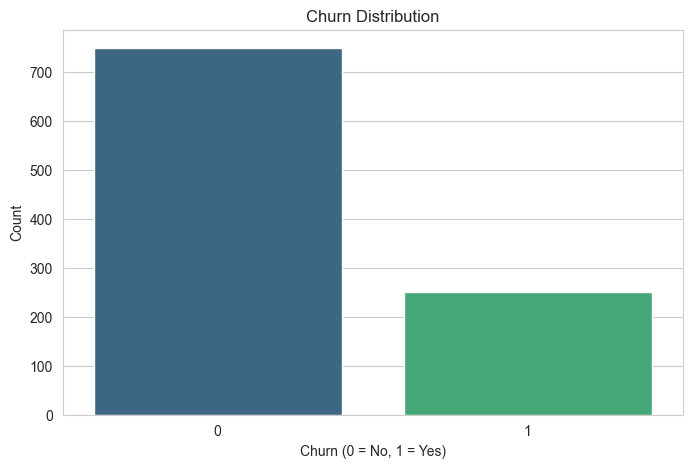

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.countplot(x =df["Churn"], palette='viridis')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")


In [17]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Churn', 'Customer Feedback',
       'Loan Account_general loan', 'Loan Account_top up loan',
       'Category_Branch Service', 'Category_Credit Card',
       'Category_Credit Cards', 'Category_Current Account',
       'Category_Customer Support', 'Category_Debit Card',
       'Category_Debit Cards', 'Category_Fixed Deposit', 'Category_General',
       'Category_Loans', 'Category_Mobile', 'Category_Mobile Banking',
       'Category_Online Banking', 'Category_Savings',
       'Category_Savings Account'],
      dtype='object')

From the distribution we can see that the churn is more skewed towards No, having more customers who churned

Train Test split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((799, 36), (200, 36), (799,), (200,))

StandardScaler for numeric values

In [20]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["tenure in months", "Monthly Average Balance (USD)", "Yearly Average Balance (USD)"]

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
538,8606-CIQUL,1,1,1,1,1.648853,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
568,7123-WQUHX,1,0,0,0,0.262596,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
800,4572-DVCGN,0,0,0,0,-0.879028,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
231,2359-KMGLI,1,0,0,0,-0.308216,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
874,2085-JVGAD,1,0,1,0,0.221824,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Using different classification models to compare the results

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression(random_state=42, max_iter = 1000)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     999 non-null    object 
 1   Gender                         999 non-null    int32  
 2   Senior Citizen                 999 non-null    int64  
 3   Marital Status                 999 non-null    int32  
 4   Dependents                     999 non-null    int32  
 5   tenure in months               999 non-null    float64
 6   Priority Account               999 non-null    int32  
 7   Credit Cards                   999 non-null    int32  
 8   Netbanking                     999 non-null    int32  
 9   Debit Card                     999 non-null    int32  
 10  MobileApp                      999 non-null    int32  
 11  TechSupport Availed            999 non-null    int32  
 12  Zero Balance Account           999 non-null    int

Removing non numeric columns customerID and customer feedback before training 

In [23]:
X_train_numeric = X_train.drop(columns=["customerID", "Customer Feedback"])
X_test_numeric = X_test.drop(columns=["customerID", "Customer Feedback"])

log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

log_reg.fit(X_train_numeric, y_train)

y_pred_log_reg = log_reg.predict(X_test_numeric)

log_reg_metrics = {
    "Accuracy": accuracy_score(y_test,y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1 Score": f1_score(y_test, y_pred_log_reg)

}

log_reg_metrics

{'Accuracy': 0.715,
 'Precision': 0.4567901234567901,
 'Recall': 0.74,
 'F1 Score': 0.5648854961832062}

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_numeric, y_train)
y_pred_rf = rf_model.predict(X_test_numeric)

rf_metrics = {
    "Accuracy": accuracy_score(y_test,y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)

}

rf_metrics

{'Accuracy': 0.795,
 'Precision': 0.6216216216216216,
 'Recall': 0.46,
 'F1 Score': 0.5287356321839081}

Selecting the best model based on precision recall and F1 Score nd saving it for further use

In [25]:
import joblib
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

Extracting features important for Randomforest model

In [26]:
X_train_numeric.columns

Index(['Gender', 'Senior Citizen', 'Marital Status', 'Dependents',
       'tenure in months', 'Priority Account', 'Credit Cards', 'Netbanking',
       'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Loan Account_general loan',
       'Loan Account_top up loan', 'Category_Branch Service',
       'Category_Credit Card', 'Category_Credit Cards',
       'Category_Current Account', 'Category_Customer Support',
       'Category_Debit Card', 'Category_Debit Cards', 'Category_Fixed Deposit',
       'Category_General', 'Category_Loans', 'Category_Mobile',
       'Category_Mobile Banking', 'Category_Online Banking',
       'Category_Savings', 'Category_Savings Account'],
      dtype='object')

In [27]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train_numeric.columns,
    "Importance": feature_importance
})

print("Printing features with sorted importance")

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending  = False)
feature_importance_df

Printing features with sorted importance


,Feature,Importance
16,Yearly Average Balance (USD),0.146969
4,tenure in months,0.144651
13,Interest Deposited,0.135668
15,Monthly Average Balance (USD),0.124016
18,Loan Account_top up loan,0.043362
10,TechSupport Availed,0.031038
14,Paperless Banking,0.026155
7,Netbanking,0.025929
3,Dependents,0.022006
1,Senior Citizen,0.020950


In [28]:
#%pip install xgboost

In [29]:
from xgboost import XGBClassifier

churn_counts = y_train.value_counts()

# Using this to balance class imbalance non churn is grater than churn
scale_pos_weight = churn_counts[0] / churn_counts[1]

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

xgb_model.fit(X_train_numeric, y_train)

C:\Users\naman\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [30]:
y_pred_xgb = xgb_model.predict(X_test_numeric)


In [31]:
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
    
}
xgb_metrics

{'Accuracy': 0.75,
 'Precision': 0.5,
 'Recall': 0.62,
 'F1 Score': 0.5535714285714286}

Using a pre-trained sentiment analysis model RoBERTa from HuggingFaceHub

In [40]:
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
#%pip install tf-keras

In [32]:
import tensorflow as tf
import tf_keras as keras

In [33]:
#%pip install transformers torch

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = f"distilbert/distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

#print(model.config.id2label)

sentiment_pipeline = pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Device set to use cpu


In [34]:
sentiment_pipeline("I am not happy with your decision")

[{'label': 'NEGATIVE', 'score': 0.9997380375862122}]

In [38]:

df["DistilBERT_Sentiment"] = df["Customer Feedback"].dropna().apply(lambda x: sentiment_pipeline(x)[0]['label'])
df[["Customer Feedback", "DistilBERT_Sentiment"]].head()

,Customer Feedback,DistilBERT_Sentiment
0,My Credit Card is not generating OTP.,NEGATIVE
1,The Current Account charges are too high.,NEGATIVE
2,The loan prepayment charges are too high.,NEGATIVE
3,The Savings Account opening process was very s...,POSITIVE
4,The loan documentation process is very complic...,NEGATIVE


Preprocessing text to use TextBlob a python library for NLP task and comparing the result

In [42]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df["Cleaned_Feedback"] = df["Customer Feedback"].dropna().apply(preprocess_text)

df[["Customer Feedback", "Cleaned_Feedback"]].head()

,Customer Feedback,Cleaned_Feedback
0,My Credit Card is not generating OTP.,my credit card is not generating otp
1,The Current Account charges are too high.,the current account charges are too high
2,The loan prepayment charges are too high.,the loan prepayment charges are too high
3,The Savings Account opening process was very s...,the savings account opening process was very s...
4,The loan documentation process is very complic...,the loan documentation process is very complic...


In [32]:
#%pip install textblob

No need of this as it gives less accuracy than models like distilbert

In [43]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df["Sentiment Score"] = df["Cleaned_Feedback"].apply(get_sentiment)
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "Positive" if x>0 else ("Negative" if x<0 else "Neutral"))

df[["Customer Feedback", "Cleaned_Feedback", "Sentiment Score", "Sentiment"]]


,Customer Feedback,Cleaned_Feedback,Sentiment Score,Sentiment
0,My Credit Card is not generating OTP.,my credit card is not generating otp,0.000000,Neutral
1,The Current Account charges are too high.,the current account charges are too high,0.080000,Positive
2,The loan prepayment charges are too high.,the loan prepayment charges are too high,0.160000,Positive
3,The Savings Account opening process was very s...,the savings account opening process was very s...,0.520000,Positive
4,The loan documentation process is very complic...,the loan documentation process is very complic...,-0.650000,Negative
...,...,...,...,...
994,The Current Account customer service is very p...,the current account customer service is very poor,-0.260000,Negative
995,The Current Account opening process was very e...,the current account opening process was very easy,0.281667,Positive
996,The branch staff are very courteous and helpful.,the branch staff are very courteous and helpful,0.780000,Positive
997,How do I activate my new Debit Card?,how do i activate my new debit card,0.136364,Positive


In [44]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account,DistilBERT_Sentiment,Cleaned_Feedback,Sentiment Score,Sentiment
0,5522-JBWMO,1,0,0,1,1.0,1,0,0,0,...,0,0,0,0,0,0,NEGATIVE,my credit card is not generating otp,0.00,Neutral
1,5275-PMFUT,1,0,1,1,72.0,0,0,1,1,...,0,0,0,0,0,0,NEGATIVE,the current account charges are too high,0.08,Positive
2,5609-CEBID,0,1,0,0,20.0,1,1,0,1,...,1,0,0,0,0,0,NEGATIVE,the loan prepayment charges are too high,0.16,Positive
3,4381-MHQDC,0,0,0,0,47.0,1,1,1,0,...,0,0,0,0,0,1,POSITIVE,the savings account opening process was very s...,0.52,Positive
4,6353-BRMMA,0,0,1,1,54.0,1,1,1,1,...,1,0,0,0,0,0,NEGATIVE,the loan documentation process is very complic...,-0.65,Negative


In [34]:
df1 = pd.read_excel("churn.xlsx")

In [35]:
df1.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


In [37]:
len(X_train.columns)

36

In [36]:
X_train.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Customer Feedback',
       'Loan Account_general loan', 'Loan Account_top up loan',
       'Category_Branch Service', 'Category_Credit Card',
       'Category_Credit Cards', 'Category_Current Account',
       'Category_Customer Support', 'Category_Debit Card',
       'Category_Debit Cards', 'Category_Fixed Deposit', 'Category_General',
       'Category_Loans', 'Category_Mobile', 'Category_Mobile Banking',
       'Category_Online Banking', 'Category_Savings',
       'Category_Savings Account'],
      dtype='object')

Creating Chatbot using Groq API and providing the context as the setiment analysis result and the customers data avilable from the dataset so that the chatbot can provide a retention strategy if churn of other response

In [ ]:
import pandas as pd
import joblib
import requests

#Loading saved model
rf_model = joblib.load("rf_model.joblib")



GROQ_API_KEY = groq_api_key
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key=GROQ_API_KEY):
    """Analyzes sentiment using the Groq API"""

    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json"
    }

    data = {
        "model": "meta-llama/llama-4-scout-17b-16e-instruct",
        "temperature": 0.3,
        "messages": [
            {
                "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.",  
            }
        ]
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data) 
        response.raise_for_status()
        result = response.json()
        sentiment = result["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment  = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
    
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."
    

    customer_data = customer_data.iloc[0]
    if customer_id in X_train['customerID'].values:
        customer_row = X_train[X_train['customerID']==customer_id].iloc[0]
    
    elif customer_id in X_test['customerID'].values:
        customer_row = X_test[X_test["customerID"] == customer_id].iloc[0]

    else:
        return f"Customer ID '{customer_id}' not found in preprocessed data."
    

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])
    #print(customer_row2, customer_row2.shape)

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]

    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"


    #sentiment analysis

    user_sentiment = analyze_sentiment(user_query)

    context = f"Customer ID: {customer_id}."
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}."

    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}."
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."


    headers = {
        "Authorization": f"Bearer {GROQ_API_KEY}",
        "Content-Type": "application/json",
    }

    data = {
        "model": "llama-3.3-70b-versatile",
        "messages": [
            {
                "role": "user",
                "content": f"Generate a personalized retention strategy for the following customer: {context}. Focus on addressing their needs and high churn risk."
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        retention_strategy = response.json()["choices"][0]["message"]["content"].strip()
        return retention_strategy
    
    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}"
    
if __name__ == "__main__":
    customer_id = "5522-JBWMO"
    user_query = "My internet is very slow, and I'm thinking of switching providers."

    response = chatbot_handler(customer_id, user_query)
    print(response)
    

Based on the customer data, I've identified key areas to focus on for a personalized retention strategy:

**Customer Profile:**

* Young adult (non-senior citizen)
* Single (marital status: 0)
* Has 1 dependent
* High-value customer (Priority Account: 1)
* Short tenure (1 month)
* No credit cards, net banking, debit card, or mobile app usage
* Has a loan account (general loan: 1)
* Low average balance (Monthly: $44, Yearly: $44)

**Concerns and Pain Points:**

1. **Credit Card Issue:** Customer is experiencing problems with their credit card not generating OTP (One-Time Password).
2. **Internet Speed:** Customer is dissatisfied with their internet speed and is considering switching providers.
3. **Lack of Engagement:** Customer has not used various banking channels (net banking, debit card, mobile app).

**Retention Strategy:**

To address the customer's concerns and prevent churn, I propose the following multi-step approach:

**Short-Term (Within 1 week):**

1. **Resolve Credit Card I

In [40]:
len(X_train.columns)

36

In [64]:
import pandas as pd
import joblib
import requests

rf_model = joblib.load("rf_model.joblib")
df = pd.read_excel("churn.xlsx")

GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key = GROQ_API_KEY):
    """Analyzes sentiment using the Groq API"""
    
    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "meta-llama/llama-4-scout-17b-16e-instruct",
        "messages": [
            {
               "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.", 
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        sentiment = response.json()["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
    
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."

    customer_data = customer_data.iloc[0]


    if customer_id in X_train['customerID'].values:
      customer_row = X_train[X_train['customerID'] == customer_id].iloc[0]
    elif customer_id in X_test['customerID'].values:
      customer_row = X_test[X_test['customerID'] == customer_id].iloc[0]
    else:
      return f"Customer ID '{customer_id}' not found in preprocessed data."

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]
    #churn_probability = rf_model.predict_proba(customer_row2)#[0][1]
    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"

    user_sentiment = analyze_sentiment(user_query)


    context = f"Customer ID: {customer_id}. "
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}. "
    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}. "
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."


    headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
    }
    data = {
        "model": "llama-3.3-70b-versatile",
        "messages": [
            {
                "role": "user",
                "content": f"""
                Given the following customer context: {context},
                generate a tailored communication plan to reduce churn risk and address the user's query.
                Also generate a concise chatbot response that directly addresses the users query.
                Format your response as follows:
                Communication Plan: [Your tailored communication plan here]
                Chatbot Response: [Your chatbot response here]
                """,
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        response_content = response.json()["choices"][0]["message"]["content"].strip()


        communication_plan = ""
        chatbot_response = ""
        if "Communication Plan:" in response_content:
            communication_plan = response_content.split("Communication Plan:")[1].split("Chatbot Response:")[0].strip()
        if "Chatbot Response:" in response_content:
            chatbot_response = response_content.split("Chatbot Response:")[1].strip()

        return communication_plan, chatbot_response

    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}", f"An error occurred."


customer_id = "5522-JBWMO"
user_query = "My internet is very slow, and I'm thinking of switching providers."

response = chatbot_handler(customer_id, user_query)
print(response)

("To reduce churn risk and address the user's query, we will employ a multi-step approach. Firstly, acknowledge the customer's concern about their internet speed and respond promptly to their user query. Since the customer has a general loan account and a relatively low monthly average balance, we should focus on building a strong relationship and providing excellent customer service. We will offer personalized assistance to resolve the internet speed issue, potentially recommending alternative internet service providers or troubleshooting steps. Additionally, we will provide information about our bank's services and how they can be easily managed online or through mobile banking, which the customer is not currently utilizing. Given the customer's recent complaint about their credit card not generating OTP, we will also review their account settings and ensure that all services are functioning correctly. By addressing the customer's immediate concerns and showcasing our bank's capabili

In [65]:
import pandas as pd
import joblib
import requests

#Load your trained model and scaler (if used)
rf_model = joblib.load("rf_model.joblib")
#scaler = joblib.load("scaler.joblib")

df2 = pd.read_excel("churn.xlsx")

GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key=GROQ_API_KEY):
    """Analyze sentiment using Groq API"""

    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.",
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        sentiment = response.json()["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
    
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."

    customer_data = customer_data.iloc[0]


    if customer_id in X_train['customerID'].values:
      customer_row = X_train[X_train['customerID'] == customer_id].iloc[0]
    elif customer_id in X_test['customerID'].values:
      customer_row = X_test[X_test['customerID'] == customer_id].iloc[0]
    else:
      return f"Customer ID '{customer_id}' not found in preprocessed data."

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]
    #churn_probability = rf_model.predict_proba(customer_row2)#[0][1]
    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"

    user_sentiment = analyze_sentiment(user_query)


    context = f"Customer ID: {customer_id}. "
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}. "
    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}. "
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."

    headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
    }
    data = {
        "model": "llama-3.3-70b-versatile",
        "messages": [
            {
                "role": "user",
                "content": f"""
                Given the following customer context: {context},
                generate a tailored communication plan to reduce churn risk and address the user's query.
                Also generate a concise chatbot response that directly addresses the users query.
                Format your response as follows:
                Communication Plan: [Your tailored communication plan here]
                Chatbot Response: [Your chatbot response here]
                """,
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        response_content = response.json()["choices"][0]["message"]["content"].strip()


        communication_plan = ""
        chatbot_response = ""
        if "Communication Plan:" in response_content:
            communication_plan = response_content.split("Communication Plan:")[1].split("Chatbot Response:")[0].strip()
        if "Chatbot Response:" in response_content:
            chatbot_response = response_content.split("Chatbot Response:")[1].strip()

        return communication_plan, chatbot_response

    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}", f"An error occurred."


customer_id = "5522-JBWMO"
user_query = "My internet is very slow, and I'm thinking of switching providers."

response = chatbot_handler(customer_id, user_query)
print(response[0])
print("Chatbot response:")
print(response[1])

Error during Groq API call: 400 Client Error: Bad Request for url: https://api.groq.com/openai/v1/chat/completions
To reduce churn risk and address the user's query, we'll employ a multi-step approach. First, acknowledge the customer's concern about their internet speed and express appreciation for their feedback. Since the customer has a general loan account and is a priority account holder, we can offer personalized assistance to resolve their issue. We will provide a dedicated contact for tech support and offer to help them troubleshoot or upgrade their internet plan. Additionally, we'll inform them about our available services, such as net banking and mobile banking, to enhance their overall experience. Given the customer's dependence on paper-based transactions, we can also educate them on the benefits of paperless banking. To further mitigate churn risk, we can offer incentives, such as discounts or rewards, for continuing their service with us. Regular follow-ups will be schedul

In [44]:
print("Chatbot Response:")
print(response[1])

Chatbot Response:
"Hello, we apologize for the slow internet speed you are experiencing. Our technical support team will contact you within 24 hours to diagnose the issue and provide a solution. We value your business and want to ensure that you are completely satisfied with our services. Thank you for your patience."
